In [2]:
# call __init_ to set notebook seed
import set_notebook_env
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import statsmodels.formula.api as smf
from scipy.stats import mannwhitneyu

from collections import defaultdict
import numpy as np

import set_notebook_env
loader, plot_utils = set_notebook_env.set_env(
    data_dir="../data/", 
    min_ratings=0, 
    max_ratings=None,
    drop_inconsistent_gender = True
)

SEED = np.random.get_state()[1][0]


Using seed: 18787288


In [4]:
loader.initial_setup()
loader.add_tag_intensity_score()
prepared_df = loader.add_gender_code(loader.prepared_df)
prepared_df.columns
tag_columns = loader.tag_cols
prepared_df.columns

Index(['avg_rating', 'avg_difficulty', 'num_ratings', 'pepper',
       'would_take_again_prop', 'num_online_ratings', 'male', 'female',
       'tough_grader', 'good_feedback', 'respected', 'lots_to_read',
       'participation_matters', 'no_skip', 'lots_of_hw', 'inspirational',
       'pop_quizzes', 'accessible', 'papers', 'clear_grading', 'hilarious',
       'test_heavy', 'few_things', 'amazing_lectures', 'caring',
       'extra_credit', 'group_projects', 'lecture_heavy', 'major',
       'university', 'state', 'tag_intensity_score_tough_grader',
       'tag_intensity_score_good_feedback', 'tag_intensity_score_respected',
       'tag_intensity_score_lots_to_read',
       'tag_intensity_score_participation_matters',
       'tag_intensity_score_no_skip', 'tag_intensity_score_lots_of_hw',
       'tag_intensity_score_inspirational', 'tag_intensity_score_pop_quizzes',
       'tag_intensity_score_accessible', 'tag_intensity_score_papers',
       'tag_intensity_score_clear_grading', 'tag_inte

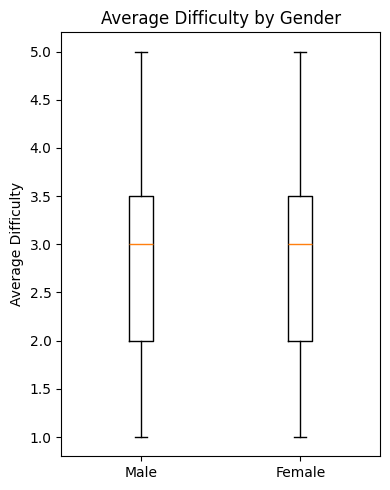

In [16]:
# plot `avg_difficulty` vs. 'gender_code' from prepared_df

data_m = prepared_df.loc[prepared_df["gender_code"] == 0, "avg_difficulty"]
data_f = prepared_df.loc[prepared_df["gender_code"] == 1, "avg_difficulty"]

plt.figure(figsize=(4, 5))
plt.boxplot(
    [data_m, data_f],
    labels=["Male", "Female"],
    showfliers=False
)

plt.ylabel("Average Difficulty")
plt.title("Average Difficulty by Gender")
plt.tight_layout()
plt.show()


In [13]:
mannwhitneyu(
    data_m,
    data_f
)

MannwhitneyuResult(statistic=337715654.0, pvalue=0.6382342663293457)

In [14]:
def cliffs_delta(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    return (np.sum(x[:, None] > y[None, :]) - np.sum(x[:, None] < y[None, :])) / (len(x) * len(y))

cliffs_delta(data_f, data_m)


0.002372787840383057

Mean diff (F − M): 0.005682825009283743
95% CI: (-0.004448864511289452, 0.022951466482058428)


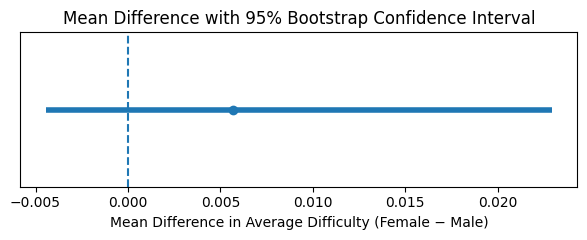

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def bootstrap_ci_mean_diff(x, y, B=10, seed=42):
    rng = np.random.default_rng(seed)
    diffs = np.empty(B)

    for b in range(B):
        xb = rng.choice(x, size=len(x), replace=True)
        yb = rng.choice(y, size=len(y), replace=True)
        diffs[b] = xb.mean() - yb.mean()  # Female − Male

    lo, hi = np.quantile(diffs, [0.025, 0.975])
    return diffs.mean(), lo, hi, diffs

# --- compute ---
mean_diff_hat = data_f.mean() - data_m.mean()
mean_diff_boot, ci_lo, ci_hi, boot_diffs = bootstrap_ci_mean_diff(data_f, data_m)

print("Mean diff (F − M):", mean_diff_hat)
print("95% CI:", (ci_lo, ci_hi))

# --- plot ---
plt.figure(figsize=(6, 2.5))

plt.hlines(
    y=0,
    xmin=ci_lo,
    xmax=ci_hi,
    linewidth=4
)

plt.plot(mean_diff_hat, 0, marker="o")
plt.axvline(0, linestyle="--")

plt.yticks([])
plt.xlabel("Mean Difference in Average Difficulty (Female − Male)")
plt.title("Mean Difference with 95% Bootstrap Confidence Interval")

plt.tight_layout()
plt.show()
